<a href="https://colab.research.google.com/github/aviraltripathi123/aviraltripathi123/blob/main/mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand** **Written** **Digit** **Prediction**





# **Objective-**

The primary objective of the handwritten digit prediction project is to build a machine learning model capable of accurately recognizing and classifying handwritten digits (ranging from 0 to 9) based on image data. By leveraging a dataset like *MNIST* or *scikit-learn's digits dataset*, the project aims to:

1. *Train a classification model* that can distinguish between different digit images using techniques such as logistic regression, support vector machines, or neural networks.
2. *Evaluate the model's performance* using metrics such as accuracy, confusion matrix, and classification report.
3. *Test the model* on unseen data to ensure its ability to generalize and accurately predict handwritten digits in real-world scenarios.

This project demonstrates the application of supervised learning in computer vision, specifically in optical character recognition (OCR) tasks.

In [ ]:
!git clone https://github.com/Akankshasingh07/machine_learning_project.git

Cloning into 'machine_learning_project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

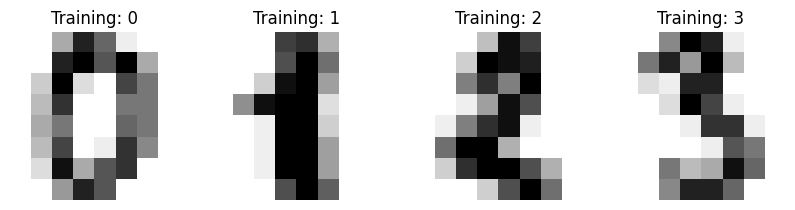

In [ ]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax, image, label in zip(axes, df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %d" % label)

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

**Scaling** **Image** **Data**

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(data,df.target,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

**Pridict Test Data**

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([6, 6, 3, 6, 0, 1, 5, 4, 1, 8, 3, 3, 8, 1, 0, 7, 3, 6, 0, 5, 7, 7,
       2, 3, 6, 0, 5, 7, 2, 9, 8, 2, 6, 8, 1, 7, 1, 5, 8, 5, 9, 5, 8, 0,
       9, 8, 1, 2, 4, 4, 8, 7, 6, 9, 7, 0, 3, 2, 2, 4, 7, 8, 8, 1, 5, 9,
       0, 7, 0, 1, 8, 0, 0, 7, 5, 6, 7, 5, 8, 5, 6, 7, 7, 9, 7, 9, 2, 7,
       4, 0, 1, 9, 1, 4, 2, 0, 7, 3, 1, 7, 1, 0, 0, 7, 1, 9, 7, 2, 4, 5,
       0, 5, 9, 2, 2, 4, 7, 0, 8, 3, 9, 8, 6, 0, 6, 0, 7, 2, 3, 5, 6, 7,
       9, 9, 5, 8, 9, 2, 5, 7, 0, 8, 1, 0, 0, 2, 2, 1, 3, 1, 8, 6, 1, 8,
       6, 6, 4, 5, 8, 9, 9, 6, 2, 7, 5, 5, 5, 3, 5, 9, 4, 7, 9, 0, 5, 7,
       8, 2, 3, 2, 8, 3, 4, 7, 1, 1, 0, 2, 9, 6, 9, 2, 3, 9, 1, 3, 1, 3,
       5, 7, 4, 7, 8, 6, 7, 3, 4, 0, 7, 3, 9, 0, 7, 5, 4, 6, 5, 6, 6, 7,
       4, 0, 0, 2, 7, 9, 1, 5, 4, 5, 6, 6, 8, 6, 7, 4, 1, 8, 2, 6, 6, 7,
       1, 1, 0, 0, 5, 8, 1, 0, 3, 5, 8, 3, 2, 7, 7, 1, 2, 2, 3, 0, 9, 9,
       4, 9, 6, 4, 2, 8, 3, 1, 2, 2, 0, 4, 9, 8, 7, 7, 2, 9, 0, 0, 6, 4,
       4, 3, 3, 9, 2, 4, 0, 6, 3, 1, 1, 3, 0, 1, 1,

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
 confusion_matrix(y_test,y_pred)

array([[56,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 54,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 52,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 61,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 54,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 46]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.98      1.00      0.99        53
           2       0.98      0.96      0.97        56
           3       0.98      0.96      0.97        48
           4       1.00      0.98      0.99        55
           5       1.00      0.98      0.99        53
           6       1.00      0.98      0.99        55
           7       0.98      1.00      0.99        61
           8       0.95      0.96      0.96        56
           9       0.94      0.98      0.96        47

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



# Explanation
This project is an excellent demonstration of using machine learning to recognize handwritten digits. The project utilizes the scikit-learn library’s built-in digits dataset and employs a RandomForestClassifier model to predict the digits based on image data.

Steps Involved in the Project:
1. Importing Libraries:
At the beginning, essential libraries such as pandas, numpy, and matplotlib.pyplot are imported. These libraries help in handling data, performing numerical computations, and visualizing graphs, respectively.

2. Loading the Digits Dataset:
Using the load_digits() function from sklearn.datasets, the handwritten digits dataset is loaded. This dataset contains images of handwritten digits and their corresponding labels.

3. Data Visualization:
With the help of matplotlib.pyplot, a few sample images and their respective labels are displayed. This provides a clear understanding of how the data looks and what kind of digits are present in the dataset.

4. Data Preprocessing:
Before training the model, some preprocessing steps are applied to the data:

Reshaping: The images are reshaped into a suitable format to be used by the model.
Scaling: To improve model performance, pixel values are scaled by dividing them by 16, so the values range between 0 and 1.
Train-Test Split: The data is split into training and testing sets using the train_test_split function from sklearn.model_selection. The training data is used to train the model, while the testing data is used to evaluate its performance.
5. Model Training:
A RandomForestClassifier model from sklearn.ensemble is created and trained using the training data. This model builds multiple decision trees and merges them to make more accurate predictions.

6. Making Predictions:
Once the model is trained, it is used to make predictions on the testing data.

7. Evaluation:
The performance of the model is evaluated using the confusion_matrix and classification_report functions from sklearn.metrics. These functions provide insights into the model’s accuracy and its ability to correctly predict each digit class.

This project is a basic example of how machine learning can be used for tasks such as handwritten digit recognition. By experimenting with different models, tuning hyperparameters, and applying various evaluation metrics, the performance and robustness of this model can be further enhanced.